In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [29]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type        to reduce memory usage.            """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                #    df[col] = df[col].astype(np.float32)
                #else:
                df[col] = df[col].astype(np.float16)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [30]:
df_train=pd.read_csv('train_final.csv')
df_test=pd.read_csv('test_final.csv')

In [31]:
print(df_train.shape)
target=df_train.Y
df_train.drop('Y',axis='columns',inplace=True)


(16383, 26)


In [32]:
df_train

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,25884,1,33.63,118596,1,0,118595,125738,1,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,34346,1,10.62,118041,1,0,117902,130913,1,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,34923,1,1.77,118327,1,0,117961,124402,1,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,80926,1,30.09,118300,1,0,117961,301218,1,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,4674,1,1.77,119921,1,0,119920,302830,1,...,13836,142145,4673,1,128230,1,1,1,620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,16379,33328,1,1.77,118343,1,0,117961,117906,1,...,4533,118700,290919,1,118321,1,1,1,1,1
16379,16380,19944,1,1.77,118225,1,0,117961,132097,1,...,4663,120323,119095,3,132096,1,1,1,8,1
16380,16381,28359,1,3.54,118327,1,0,117961,174445,1,...,7822,118492,270488,1,132692,1,2,1,1,1
16381,16382,7542,1,3.54,118343,1,0,117961,117906,1,...,6257,120722,290919,1,118784,1,1,1,12,1


In [33]:
print(df_test.shape)
df_test

(16385, 25)


,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,16384,37733,1,1.77,118603,1,0,118602,118097,1,...,13881,117941,117887,1,117885,1,1,1,1,1
1,16385,312129,1,3.54,118052,1,0,117961,290919,1,...,14638,118992,290919,1,118321,1,1,1,7,1
2,16386,24884,1,23.01,118300,1,0,117961,302830,1,...,770,119181,4673,1,128230,1,1,1,14,1
3,16387,4674,1,1.77,119091,1,0,119062,118036,1,...,16752,143531,290919,1,117905,1,1,1,81,1
4,16388,68725,1,3.54,118300,1,0,117961,171056,1,...,4945,118360,118638,1,118636,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,32764,971,1,1.77,118300,1,0,117961,310997,1,...,4864,123055,118424,1,120344,1,1,1,44,1
16381,32765,105802,1,1.77,118327,1,0,117961,117906,1,...,32457,118320,290919,1,118321,1,1,1,4,1
16382,32766,43096,1,3.54,117962,1,0,117961,118368,1,...,2014,117904,117887,1,118368,1,1,1,1,1
16383,32767,31220,1,1.77,118386,1,0,117961,117906,1,...,1249,118910,290919,1,118321,1,1,1,2,2


In [34]:
frames=[df_train,df_test]
df=pd.concat(frames)
reduce_mem_usage(df)

Memory usage of dataframe is 6.50 MB
Memory usage after optimization is: 2.25 MB
Decreased by 65.4%


,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,25884,1,33.625000,118596,1,0,118595,125738,1,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,34346,1,10.617188,118041,1,0,117902,130913,1,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,34923,1,1.769531,118327,1,0,117961,124402,1,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,80926,1,30.093750,118300,1,0,117961,301218,1,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,4674,1,1.769531,119921,1,0,119920,302830,1,...,13836,142145,4673,1,128230,1,1,1,620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,32764,971,1,1.769531,118300,1,0,117961,310997,1,...,4864,123055,118424,1,120344,1,1,1,44,1
16381,32765,105802,1,1.769531,118327,1,0,117961,117906,1,...,32457,118320,290919,1,118321,1,1,1,4,1
16382,32766,43096,1,3.539062,117962,1,0,117961,118368,1,...,2014,117904,117887,1,118368,1,1,1,1,1
16383,32767,31220,1,1.769531,118386,1,0,117961,117906,1,...,1249,118910,290919,1,118321,1,1,1,2,2


In [35]:
df.describe()

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,32768.000000,32768.000000,32768.000000,3.276800e+04,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,...,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,3.276800e+04,32768.000000
mean,16384.500000,42923.115509,1.042511,inf,118301.823212,1.045441,0.047760,116952.597015,170179.938049,1.043030,...,25989.522491,118912.771729,183700.136932,1.048279,125916.370300,1.045715,1.043549,1.041229,2.228435e+04,1.043182
std,9459.451147,34174.395115,0.265731,inf,4551.658025,0.276843,0.310656,10875.728116,69509.942939,0.263166,...,35928.434551,18961.612193,100488.195184,0.294797,31036.914405,0.263293,0.265218,0.240249,2.305925e+06,0.267341
min,1.000000,-1.000000,1.000000,1.769531e+00,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,...,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,8192.750000,20298.000000,1.000000,1.769531e+00,118102.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,...,4566.000000,118394.000000,118363.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,16384.500000,35375.000000,1.000000,1.769531e+00,118300.000000,1.000000,0.000000,117961.000000,128696.000000,1.000000,...,13545.000000,118921.000000,119006.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,24576.250000,74188.250000,1.000000,3.539062e+00,118386.000000,1.000000,0.000000,117961.000000,235280.000000,1.000000,...,42034.000000,120535.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,32768.000000,312152.000000,17.000000,4.390400e+04,286791.000000,12.000000,24.000000,311178.000000,311867.000000,11.000000,...,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,12.000000,7.000000,4.042886e+08,16.000000


In [36]:
ID=df.Id
df1=df.drop('Id',axis='columns')
test_ID=ID[16383:]
test_ID.shape

(16385,)

In [65]:
#scaler = MinMaxScaler()
df1_=np.array(df1)
#scaler.fit(df1_)
#df3=scaler.transform(df1_)
df1_

array([[2.58840000e+04, 1.00000000e+00, 3.36250000e+01, ...,
        1.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [3.43460000e+04, 1.00000000e+00, 1.06171875e+01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.49230000e+04, 1.00000000e+00, 1.76953125e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [4.30960000e+04, 1.00000000e+00, 3.53906250e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.12200000e+04, 1.00000000e+00, 1.76953125e+00, ...,
        1.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [4.16420000e+04, 1.00000000e+00, 3.53906250e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
df4=pca.fit_transform(df1_)
df4_=pd.DataFrame(df4)

In [83]:
Norm_df=df4_.copy()

In [84]:
Norm_df

,0,1,2,3,4,5,6,7,8,9
0,-22268.407967,52085.065214,57029.318580,-30996.597867,-9759.837467,2489.387479,211.660753,1756.950380,1334.917961,563.819092
1,-22301.436455,-113630.355974,1135.821364,3307.542413,-13076.924127,135203.192490,-505.982711,-13.141631,-3651.455147,-404.541378
2,-22296.145423,-115392.000657,21006.696053,-15807.287029,-5835.596047,-2589.920204,-507.020452,621.495898,181.879609,-234.150892
3,-22281.482137,93593.925313,-131819.183054,455.380091,33536.177403,169746.368334,17.969106,656.766449,-7728.748686,240.110757
4,-21644.483839,203480.222621,-89451.146668,-24968.560221,-33298.068331,-8093.139123,24982.291091,3666.131257,6510.039011,1661.641041
...,...,...,...,...,...,...,...,...,...,...
32763,-22238.315057,94072.444162,-121741.307423,-29431.921233,-38324.734567,-17661.084747,5204.762455,1274.407489,-303.423369,22.021316
32764,-22291.559923,-116432.759050,26899.116921,21612.448088,59326.434590,-3160.345990,-2659.879361,787.033865,-283.938010,-328.414371
32765,-22267.928077,51494.748186,64408.064189,-28157.847820,7394.681154,493.698769,-748.570263,1198.093502,-1520.657067,93.147636
32766,-22294.419496,-117080.110062,27170.572267,-22814.556058,-8173.316369,-1964.307101,-470.393350,611.683646,-258.403681,-123.771398


In [85]:
Norm_df_train=Norm_df[:16383]
Norm_df_train

,0,1,2,3,4,5,6,7,8,9
0,-22268.407967,52085.065214,57029.318580,-30996.597867,-9759.837467,2489.387479,211.660753,1756.950380,1334.917961,563.819092
1,-22301.436455,-113630.355974,1135.821364,3307.542413,-13076.924127,135203.192490,-505.982711,-13.141631,-3651.455147,-404.541378
2,-22296.145423,-115392.000657,21006.696053,-15807.287029,-5835.596047,-2589.920204,-507.020452,621.495898,181.879609,-234.150892
3,-22281.482137,93593.925313,-131819.183054,455.380091,33536.177403,169746.368334,17.969106,656.766449,-7728.748686,240.110757
4,-21644.483839,203480.222621,-89451.146668,-24968.560221,-33298.068331,-8093.139123,24982.291091,3666.131257,6510.039011,1661.641041
...,...,...,...,...,...,...,...,...,...,...
16378,-22295.589181,-116953.597012,27262.721840,-19210.392853,-6709.162687,-2195.938482,-714.759392,617.300164,-251.495741,-174.609180
16379,-22263.555307,53980.866394,50037.974295,-28480.643233,-16535.327469,12439.461385,2365.354204,917.533507,11689.431174,-383.388242
16380,-22296.628679,-84056.327872,-24299.104402,-15701.057904,-13343.048647,6749.630915,-560.446117,433.637234,13341.650977,-1001.521018
16381,-22285.860321,-116621.044726,27822.995166,-22298.868810,-32306.524685,-2358.759612,1920.880913,579.180008,243.801235,-162.583459


In [86]:
Norm_df_test=Norm_df[16383:]
Norm_df_test

,0,1,2,3,4,5,6,7,8,9
16383,-22269.073870,52001.290841,65320.488326,-17598.337467,-17.378412,-1055.056625,-547.114377,1865.373615,-2002.890750,746.483669
16384,-22287.958235,-81082.183701,-145957.429088,45927.083986,261662.853702,-15014.745880,-7064.888335,1285.795655,-1364.434503,-1188.863194
16385,-22248.968680,202844.814288,-90355.573584,-33968.402781,-11612.707231,-6500.820712,1518.629980,1499.090369,6416.601844,12.585982
16386,-22217.381154,-116257.631961,28223.306322,-12645.490911,-36472.399277,-4327.670807,24812.562575,1920.707715,-617.700503,656.536401
16387,-22270.196896,62274.797039,12699.837465,-19464.028427,30940.434642,-4241.834830,-937.024520,1292.541474,-1574.300132,280.405706
...,...,...,...,...,...,...,...,...,...,...
32763,-22238.315057,94072.444162,-121741.307423,-29431.921233,-38324.734567,-17661.084747,5204.762455,1274.407489,-303.423369,22.021316
32764,-22291.559923,-116432.759050,26899.116921,21612.448088,59326.434590,-3160.345990,-2659.879361,787.033865,-283.938010,-328.414371
32765,-22267.928077,51494.748186,64408.064189,-28157.847820,7394.681154,493.698769,-748.570263,1198.093502,-1520.657067,93.147636
32766,-22294.419496,-117080.110062,27170.572267,-22814.556058,-8173.316369,-1964.307101,-470.393350,611.683646,-258.403681,-123.771398


In [87]:
import xgboost as xgb
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_train1,X_test1,y_train1,y_test1= train_test_split(Norm_df_train,target,test_size=0.2)
from imblearn.over_sampling import SMOTE
shuffle(X_train1, random_state=1)
shuffle(y_train1, random_state=1)

14418    1
4880     1
8774     1
11649    1
9943     1
        ..
12318    1
2406     1
1924     0
9235     1
11989    1
Name: Y, Length: 13106, dtype: int64

In [88]:
print("Before OverSampling, counts of label '1': {}".format(sum(target == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(target== 0)))

Before OverSampling, counts of label '1': 15435
Before OverSampling, counts of label '0': 948 



In [90]:
smote = SMOTE(sampling_strategy=1,random_state=0)
X_sm, y_sm = smote.fit_resample(X_train1, y_train1)
X_sm_real, y_sm_real = smote.fit_resample(Norm_df_train, target)

print('After OverSampling, the shape of train_X: {}'.format(X_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_sm.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sm == 0)))

After OverSampling, the shape of train_X: (24678, 10)
After OverSampling, the shape of train_y: (24678,) 

After OverSampling, counts of label '1': 12339
After OverSampling, counts of label '0': 12339


In [91]:
shuffle(X_sm, random_state=1)
shuffle(y_sm, random_state=1)
shuffle(X_sm_real, random_state=1)
shuffle(y_sm_real, random_state=1)


16815    0
16399    0
95       1
2241     1
2447     1
        ..
17289    0
5192     1
12172    1
235      1
29733    0
Name: Y, Length: 30870, dtype: int64

In [92]:
from sklearn.model_selection import cross_val_score
dtrain = xgb.DMatrix(X_sm, label=y_sm)
dtest = xgb.DMatrix(X_test1, label=y_test1)
dvaltest=xgb.DMatrix(X_test1)
drealtrain = xgb.DMatrix(X_sm_real, label=y_sm_real)
drealtest = xgb.DMatrix(Norm_df_test)
from sklearn.metrics import accuracy_score

In [93]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'binary:logistic',
    'eval_metric':'auc'
}
NUM_BOOST_ROUNDS=999

In [ ]:
xbg_model1 = xgb.train(
    params,
    dtrain,
    num_boost_round=NUM_BOOST_ROUNDS,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100
)
print("Best AUC: {:.2f}, found at round {}".format(
                 xbg_model1.best_score,
                 xbg_model1.best_iteration))

[0]	Test-auc:0.59077
[1]	Test-auc:0.62331
[2]	Test-auc:0.63597
[3]	Test-auc:0.63523
[4]	Test-auc:0.63438
[5]	Test-auc:0.63781
[6]	Test-auc:0.64745
[7]	Test-auc:0.64760
[8]	Test-auc:0.65017
[9]	Test-auc:0.65099
[10]	Test-auc:0.65336
[11]	Test-auc:0.65113
[12]	Test-auc:0.65603
[13]	Test-auc:0.65226
[14]	Test-auc:0.65685
[15]	Test-auc:0.65871
[16]	Test-auc:0.66014
[17]	Test-auc:0.65837
[18]	Test-auc:0.65714
[19]	Test-auc:0.65636
[20]	Test-auc:0.66522
[21]	Test-auc:0.66834
[22]	Test-auc:0.67000
[23]	Test-auc:0.66950
[24]	Test-auc:0.66648
[25]	Test-auc:0.66569
[26]	Test-auc:0.66628
[27]	Test-auc:0.66490
[28]	Test-auc:0.67361
[29]	Test-auc:0.66956
[30]	Test-auc:0.66813
[31]	Test-auc:0.66564
[32]	Test-auc:0.66639
[33]	Test-auc:0.66689
[34]	Test-auc:0.66725
[35]	Test-auc:0.66712


In [81]:
xbg_model1 = xgb.train(
    params,
    dtrain,
    num_boost_round=NUM_BOOST_ROUNDS,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100
)
print("Best AUC: {:.2f}, found at round {}".format(
                 xbg_model1.best_score,
                 xbg_model1.best_iteration))

[0]	Test-auc:0.78747
[1]	Test-auc:0.79037
[2]	Test-auc:0.78929
[3]	Test-auc:0.79524
[4]	Test-auc:0.79330
[5]	Test-auc:0.79132
[6]	Test-auc:0.79639
[7]	Test-auc:0.79797
[8]	Test-auc:0.79981
[9]	Test-auc:0.79570
[10]	Test-auc:0.80429
[11]	Test-auc:0.80551
[12]	Test-auc:0.80311
[13]	Test-auc:0.80025
[14]	Test-auc:0.80387
[15]	Test-auc:0.80337
[16]	Test-auc:0.80160
[17]	Test-auc:0.79981
[18]	Test-auc:0.79527
[19]	Test-auc:0.79374
[20]	Test-auc:0.79368
[21]	Test-auc:0.79431
[22]	Test-auc:0.78882
[23]	Test-auc:0.79124
[24]	Test-auc:0.79182
[25]	Test-auc:0.79057
[26]	Test-auc:0.79087
[27]	Test-auc:0.79019
[28]	Test-auc:0.79002
[29]	Test-auc:0.78889
[30]	Test-auc:0.79145
[31]	Test-auc:0.79423
[32]	Test-auc:0.79346
[33]	Test-auc:0.79232
[34]	Test-auc:0.79294
[35]	Test-auc:0.79227
[36]	Test-auc:0.79166
[37]	Test-auc:0.79258
[38]	Test-auc:0.79267
[39]	Test-auc:0.79353
[40]	Test-auc:0.79357
[41]	Test-auc:0.79256
[42]	Test-auc:0.79229
[43]	Test-auc:0.79200
[44]	Test-auc:0.79189
[45]	Test-auc:0.7926

In [121]:
xbg_model3 = xgb.train(
   params,
drealtrain,
    num_boost_round=55)

True     16058
False      327
Name: 0, dtype: int64

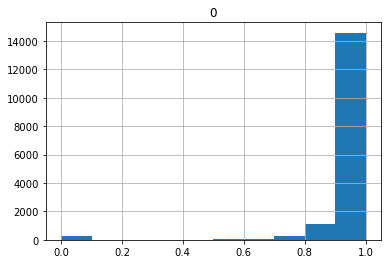

In [122]:
y_newpred=xbg_model3.predict(drealtest)
h=pd.DataFrame(y_newpred)
h.hist()
d=h>0.5
d[0].value_counts()

In [124]:
output2 = pd.DataFrame({'id':test_ID,'Y':y_newpred})
output2.to_csv('datascienceupload1this.csv', index=False)